# Работа 1.3.2 Определение модуля кручения

### Цель работы:   
измерение углов закручивания в зависимости от при-   
ложенного момента сил, расчет модулей кручения и сдвига при стати-   
ческом закручивании стержня, определение тех же модулей для про-   
волоки по измерениям периодов крутильных колебаний подвешенно-   
го на ней маятника (динамическим методом).

### В работе используются:   
исследуемый стержень,   
отсчетная труба со шкалой, рулетка, микрометр, набор грузов,  
 проволока из исследуемого материала, грузы, секундо-   
мер, микрометр, рулетка, линейка.   

## Теория 

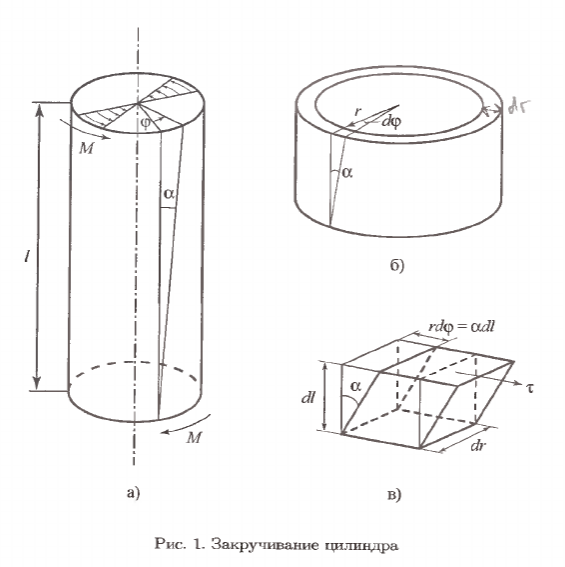

Для сдвига:
$$\sigma = G\gamma$$

Касательное напряжение в зависимости от угла:
$$\tau = G\alpha$$

$$\tau = Gr\frac{d\varphi}{dl}$$

Введем модуль кручения $f$, связанный с модулем сдвига $G$:
$$f = \frac{\pi R^{4} G}{2l}$$

## Ход работы


### 2 часть

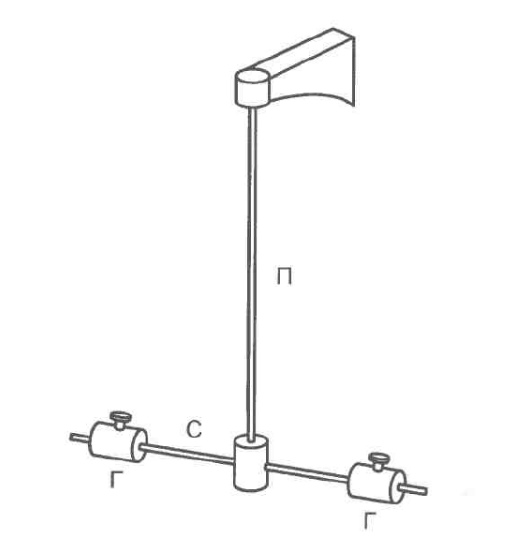

In [16]:
import numpy as np
import matplotlib.pyplot as plt


In [17]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)


Определяем радиус стержня (микрометром) и длину стержня (указана на установке)

In [18]:
rs = [0.00155 / 2, 0.00156 / 2, 0.00156 / 2, 0.00155 / 2, 0.00155 / 2, 0.00156 / 2, 0.00155 / 2]

L = 1.73 # м
sigma_L = 0.002 # м

r = np.mean(rs)
sigma_r = np.std(rs) / np.sqrt(len(rs))
r, sigma_r, 2* r


(0.0007771428571428571, 9.352195295828268e-07, 0.0015542857142857142)

Погрешность радиуса стержня мала, ей пренебрегаем

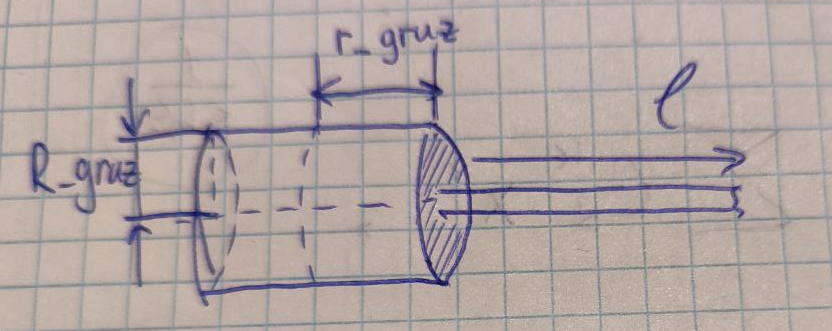

In [19]:
r_gruz = 0.0205 # м расстояние от края до середины
R_gruz = 0.0484 / 2 # м это по идее радиус циллиндра
m = 0.203 # кг масса цилиндра
sigma_m = 0.0001
l = [0.1 + r_gruz, 0.105 + r_gruz, 0.11 + r_gruz, 0.115 + r_gruz]
sigma_l = 0.001 # м линейка
T =  [np.mean([35.23 / 10, 35.33 / 10, 35.32 / 10]),
      np.mean([36.32 / 10, 36.34 / 10, 36.33 / 10]),
      np.mean([37.75 / 10, 37.73 / 10, 37.73 / 10]),
      np.mean([39.05 / 10, 39.04 / 10, 39.05 / 10])]

sigma_T = [np.std([35.23 / 10, 35.33 / 10, 35.32 / 10]) / np.sqrt(3),
           np.std([36.32 / 10, 36.34 / 10, 36.33 / 10]) / np.sqrt(3),
           np.std([37.75 / 10, 37.73 / 10, 37.73 / 10]) / np.sqrt(3),
           np.std([39.05 / 10, 39.04 / 10, 39.05 / 10]) / np.sqrt(3)]




In [20]:
l_sqr = [l**2 for l in l]
sigma_l_sqr = [2 * l * sigma_l for l in l]
T_sqr = [T**2 for T in T]
sigma_T_sqr = [2 * T * sigma_T for T, sigma_T in zip(T, sigma_T)]



735.935009118587

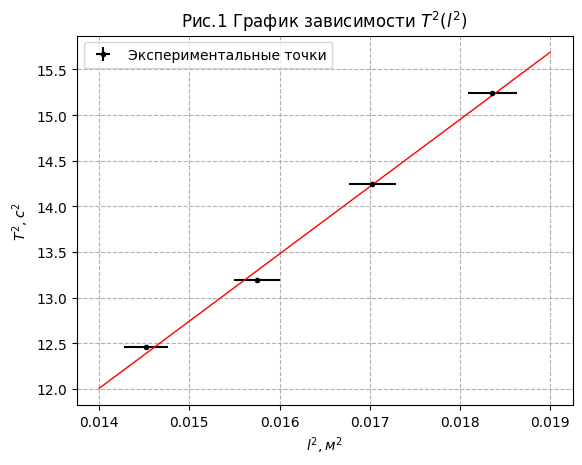

In [21]:
plt.figure(1)
plt.ylabel("$T^{2}, c^{2}$")
plt.xlabel("$l^{2}, м^{2}$")
plt.title('Рис.1 График зависимости $T^{2}(l^{2})$')
plt.grid(True, linestyle = '--')
plt.errorbar(l_sqr, T_sqr, xerr=sigma_l_sqr, yerr = sigma_T_sqr, fmt = ".k", label = "Экспериментальные точки")

k, b, kerr, berr = LeastSquares(l_sqr, T_sqr)
x = np.array([0.014, 0.019])
plt.plot(x, k*x + b, "-r", linewidth = 1)
plt.legend()
k


$$ T = 2\pi \sqrt{\frac{I}{f}} $$


Момент инерции груза $ I = \frac{m}{12}(3R^{2} + 4r_{груза}^{2})  + ml^{2}$

$ I = \frac{m}{6}(3R^{2} + 4r_{груза}^{2})  + 2ml^{2} + \frac{\rho\pi d_{стержня}^{2} l_{стержня}^{3}}{6}$

$$ T^{2} = 4  \pi^{2} \frac{I}{f} = 4 \pi^{2} \frac{\frac{m}{6}(3R^{2} + 4r_{груза}^{2})  + 2ml^{2}}{f} $$

На графике $k = 8 \pi^{2} \frac{m}{f} $, откуда
$$ f = 8 \pi^{2} \frac{m}{k} $$

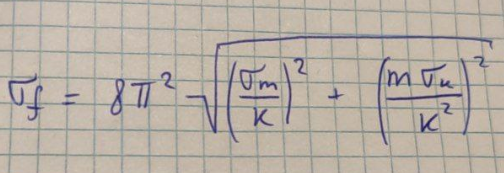

In [22]:
f = 8 * (np.pi**2) * m / k
sigma_f = 8 * (np.pi**2) * np.sqrt((sigma_m / k)**2 + (m * kerr / (k**2))**2)

f, sigma_f, sigma_f / f


(0.021779419851986365, 0.0008842804717212976, 0.04060165411801123)

$$ f ~\approx 0.022 ~\pm 0.001 ~Нм ~(\epsilon ~\approx 4 \%)$$

С другой стороны модуль кручения:
$$ f = \frac{\pi R^{4}G}{2l} $$

Модуль сдвига:
$$ G = \frac{2lf}{\pi R^{4}} $$

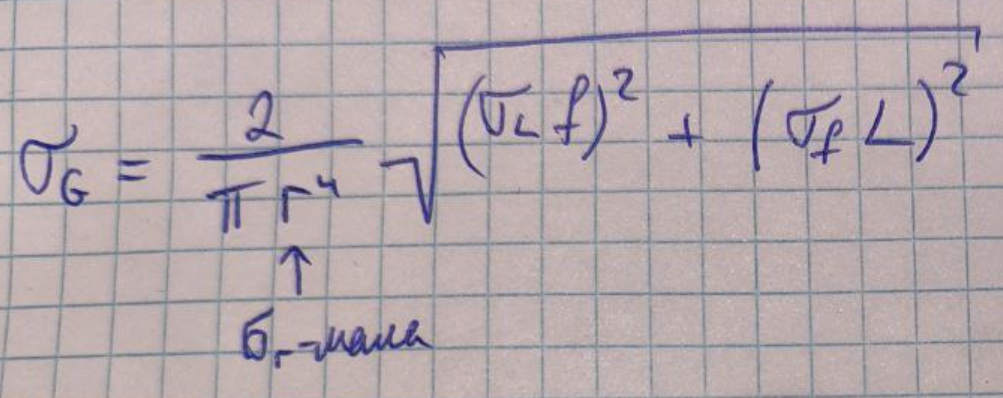

In [23]:
G = 2 * L * f / np.pi / (r**4)
sigma_G = 2 / np.pi / (r**4) * np.sqrt((sigma_L * f)**2 + (sigma_f * L)**2)
G / 1e9, sigma_G / 1e9, sigma_G / G


(65.76110383299242, 2.671091711585157, 0.04061810942785707)

Получили 
$$ G ~\approx 65.8 ~\pm 2.7 ~ГПа ~(\epsilon ~\approx 4 \%)$$

### 1 часть


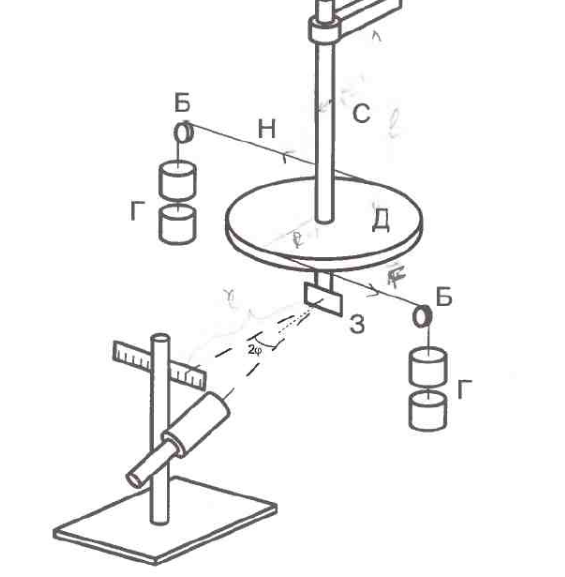

In [24]:
L = 1.328 # м

l_lazer = 1.4 # м от лазера до линейки
sigma_l_lazer = 0.05 # м

r_shkiv = 0.1072 / 2 # м радиус шкива ИЗМЕРЕН НЕТОЧНО - СНАРУЖИ
sigma_r_shkiv = 0.005 # м

r = 0.00537 / 2 # радиус стержня



In [25]:
m0 =  0.05 # кг

m = [0, 0.15, 0.1, 0.2, 0.25, 0.3] #  масса подвешенная с одной стороны (без учета платформы)
x = [0.01, 0.0725, 0.051, 0.095, 0.111, 0.128]
sigma_x = 0.001

m = [2*m + 2*m0 for m in m] # суммарная крутящая масса с учетом платформ

M = [round(m * 9.81 * r_shkiv, 3) for m in m] # суммарный момент силы

sigma_M = [9.81 * np.sqrt((sigma_m * r_shkiv)**2 + (sigma_r_shkiv * m) ** 2) for m in m]

# m, x, M


In [26]:
phi = [x / l_lazer for x in x] # tga ~ a при малых a

sigma_phi = [np.sqrt((sigma_x / l_lazer)**2 + (sigma_l_lazer * x / l_lazer**2)**2) for x in x]


3.681688404590834

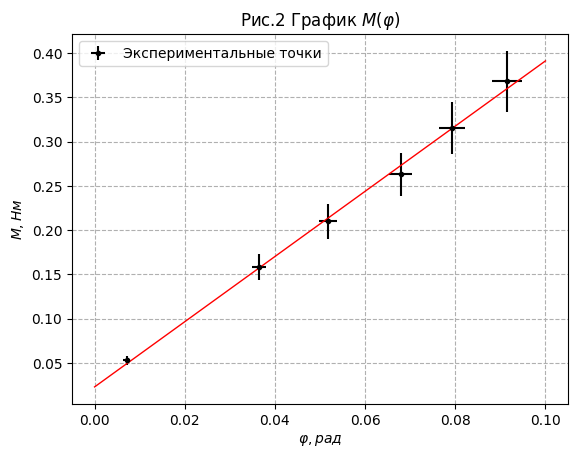

In [27]:
plt.figure(2)
plt.xlabel("$\\varphi, рад$")
plt.ylabel("$М, Нм$")
plt.title('Рис.2 График $M (\\varphi)$')
plt.grid(True, linestyle = '--')
plt.errorbar(phi, M, xerr=sigma_phi, yerr = sigma_M, fmt = ".k", label = "Экспериментальные точки")

k, b, kerr, berr = LeastSquares(phi, M)
x = np.array([0, 0.1])
plt.plot(x, k*x + b, "-r", linewidth = 1)
plt.legend()
k


$$ M = f \varphi $$

Из графика $ k = f $

In [28]:
f = k
sigma_f = kerr
f, sigma_f, sigma_f / f


(3.681688404590834, 0.1015276817710013, 0.0275763917566741)

$$ f = 3.68 ~\pm 0.10 ~Нм ~(\epsilon ~\approx 3 \%) $$

$$ f = \frac{\pi R^{4}G}{2l} $$

$$ G = \frac{2lf}{\pi R^{4}} $$

In [29]:
G = 2 * L * f / np.pi / (r**4)

sigma_G = 2 / np.pi / (r**4) * np.sqrt((sigma_L * f)**2 + (sigma_f * L)**2)
G / 1e9, sigma_G / 1e9 , sigma_G / G


(59.88913873914124, 1.653987405072209, 0.027617485238458212)

Получаем 
$$ G = 60.0 ~\pm 1.7 ~ГПа ~(\epsilon ~\approx 3 \%) $$

## Вывод

В статическом методе получили 
$$ f_{статич} = 3.68 ~\pm 0.10 ~Нм ~(\epsilon ~\approx 3 \%) $$
$$ G_{статич} = 60.0 ~\pm 1.7 ~ГПа ~(\epsilon ~\approx 3 \%) $$

В динамическом методе получили

$$ f_{динам} ~\approx 0.022 ~\pm 0.001 ~Нм ~(\epsilon ~\approx 4 \%)$$
$$ G_{динам} ~\approx 65.8 ~\pm 2.7 ~ГПа ~(\epsilon ~\approx 4 \%)$$

По таким G можно предположить, что проволока сделана из константана или платины.